# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [ ]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


In [5]:
# a helper function that takes a step in the environment and returns next_state, reward, done
def env_step(action):
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    return next_state, reward, done

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment. 
**Do not close the environment when you want to train (section 4) or test (section 5) the agent.**

In [14]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
from dqn_agent import Agent
from collections import deque
from importlib import reload
import torch
import matplotlib.pyplot as plt

In [33]:
# reload modules when the file has been edited
import dqn_agent
reload(dqn_agent)
from dqn_agent import Agent

In [7]:
# train dqn function
def dqn(n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    scores_movavg = []                 # list containing moving average of scores (for plotting)
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        while True:
            action = agent.act(state, eps)
            next_state, reward, done = env_step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_movavg.append(np.mean(scores_window)) # save moving average of window
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {} \tEpisodeScore: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            agent.save_checkpoint()
            break
    return scores, scores_movavg, i_episode

In [8]:
# layer_spec is a list of the units in the hidden layers
layer_spec = [128, 128, 128]

# instantiate agent
agent = Agent(state_size, action_size, layer_spec)

Units in the hidden layers are [128, 128, 128].
Using Double-DQN is "True".
Using prioritized experience replay is "True".


In [9]:
# train the agent
N_EPISODES = 1000
scores, avg_scores, i_episode = dqn(n_episodes=N_EPISODES)

Episode 100	Average Score: 0.40 	Average Score: 0.409
Episode 200	Average Score: 4.06 	Average Score: 4.065
Episode 300	Average Score: 7.330 	Average Score: 7.33
Episode 400	Average Score: 11.10 	Average Score: 11.10
Episode 474 	EpisodeScore: 14.00 	Average Score: 13.02
Environment solved in 474 episodes!	Average Score: 13.02
Checkpoint succesfully saved.


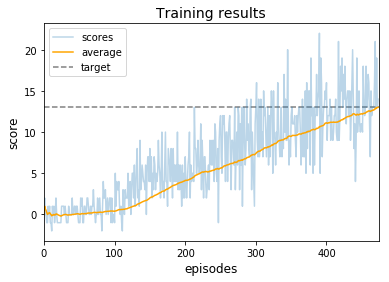

In [10]:
# plot raw and averaged scores
ax = plt.plot(scores, alpha=0.3, label='scores')
ax = plt.plot(avg_scores, color='orange', label='average')
plt.title('Training results', fontdict={'fontsize': 14})
plt.xlabel('episodes', fontdict={'fontsize': 12})
plt.ylabel('score', fontdict={'fontsize': 12})
plt.xlim([0, i_episode])
plt.hlines(13, xmin=0, xmax=i_episode, colors='0.5', linestyles='dashed', label='target')
plt.legend();

### 5. Reload and test smart agent

In this section, you can load the weights of a smart (= trained) agent and see whether it can solve the environment.
For this, you will need an active environment (run section 1-2) and the `checkpoint.pth` file with trained weights.

In [5]:
from dqn_agent import Agent
from collections import deque
from importlib import reload
import torch
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
# instantiate agent and load weights
layer_spec = [128, 128, 128]
agent = Agent(state_size, action_size, layer_spec)
agent.load_checkpoint()

Units in the hidden layers are [128, 128, 128].
Using Double-DQN is "True".
Using prioritized experience replay is "True".
Checkpoint successfully loaded.


In [14]:
def test_agent(n_episodes=2000):
    """ Test a trained agent for a maximum of n_episodes. """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    scores_movavg = []                 # list containing moving average of scores (for plotting)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        while True:
            action = agent.act(state, eps=0) # greedy policy
            next_state, reward, done = env_step(action)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_movavg.append(np.mean(scores_window)) # save moving average of window
        print('\rEpisode {} \tEpisodeScore: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if (i_episode > 99) & (np.mean(scores_window)>=13.0):
            print('\nEnvironment solved!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            break
    return scores, np.mean(scores_window), i_episode

In [15]:
scores, avg_scores, i_episode = test_agent(n_episodes=200)

Episode 100	Average Score: 13.82 	Average Score: 13.82

Environment solved!	Average Score: 100.00


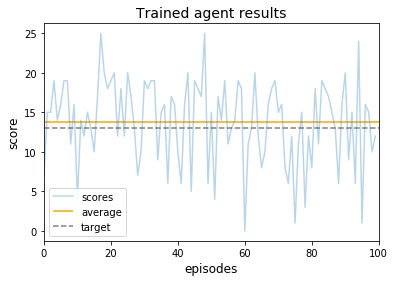

In [16]:
ax = plt.plot(scores, alpha=0.3, label='scores')
plt.title('Trained agent results', fontdict={'fontsize': 14})
plt.xlabel('episodes', fontdict={'fontsize': 12})
plt.ylabel('score', fontdict={'fontsize': 12})
plt.xlim([0, i_episode])
plt.hlines(avg_scores, xmin=0, xmax=i_episode, colors='orange', linestyles='solid', label='average')
plt.hlines(13, xmin=0, xmax=i_episode, colors='0.5', linestyles='dashed', label='target')
plt.legend();